In [41]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
train_data = pd.read_csv("C:/Machine Learning/Hackathons/Kaggle/House Price/train_Copy.csv")

In [3]:
train_data.shape

(1460, 81)

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
#to allow more rows in the output
pd.set_option("display.max_rows",85)

In [26]:
#sort_values is for sorting pandas series
col = (train_data.isnull().sum().sort_values(ascending= False)/len(train_data))[0:4].index

In [31]:
train_data.drop(col,axis=1 ,inplace=True)

In [32]:
train_data.shape

(1460, 77)

In [33]:
train_data.dtypes.value_counts()

object     39
int64      35
float64     3
dtype: int64

In [37]:
train_data.kurtosis().sort_values(ascending = False)

MiscVal          701.003342
PoolArea         223.268499
LotArea          203.243271
3SsnPorch        123.662379
LowQualFinSF      83.234817
KitchenAbvGr      21.532404
BsmtFinSF2        20.113338
ScreenPorch       18.439068
LotFrontage       17.452867
BsmtHalfBath      16.396642
TotalBsmtSF       13.250483
BsmtFinSF1        11.118236
EnclosedPorch     10.430766
MasVnrArea        10.082417
OpenPorchSF        8.490336
SalePrice          6.536282
1stFlrSF           5.745841
GrLivArea          4.895121
WoodDeckSF         2.992951
BedroomAbvGr       2.230875
MSSubClass         1.580188
OverallCond        1.106413
GarageArea         0.917067
TotRmsAbvGrd       0.880762
BsmtUnfSF          0.474994
GarageCars         0.220998
OverallQual        0.096293
Fireplaces        -0.217237
MoSold            -0.404109
GarageYrBlt       -0.418341
YearBuilt         -0.439552
2ndFlrSF          -0.553464
BsmtFullBath      -0.839098
FullBath          -0.857043
HalfBath          -1.076927
YrSold            -1

In [39]:
train_data.skew().sort_values(ascending = False)

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
Id                0.000000
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
G

In [40]:
train_data.nunique().sort_values(ascending = False)

Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
Neighborhood       25
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
Exterior2nd        16
Exterior1st        15
MSSubClass         15
TotRmsAbvGrd       12
MoSold             12
OverallQual        10
SaleType            9
OverallCond         9
Condition1          9
PoolArea            8
HouseStyle          8
RoofMatl            8
BedroomAbvGr        8
Condition2          8
Functional          7
RoofStyle           6
Foundation          6
BsmtFinType1        6
BsmtFinType2        6
Heating             6
SaleCondition       6
GarageType

In [60]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


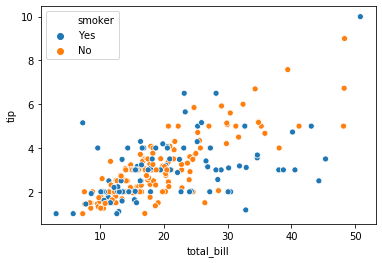

In [55]:
sns.scatterplot(x= tips.total_bill,y= tips.tip, hue=tips.smoker)

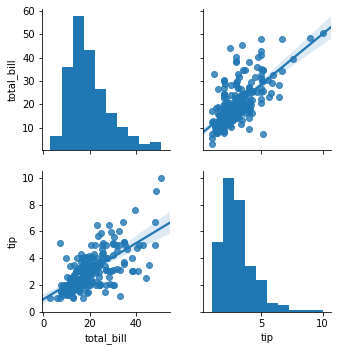

In [62]:
sns.pairplot(tips, vars=["total_bill","tip"],kind="reg")

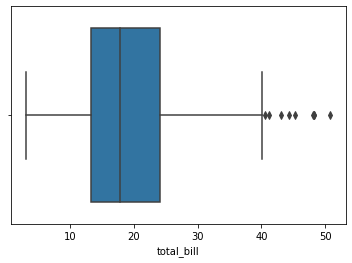

In [63]:
sns.boxplot(tips.total_bill)

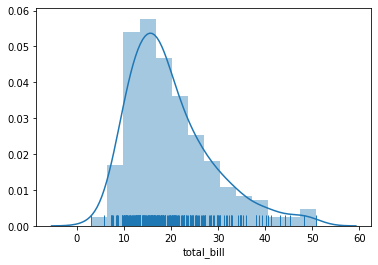

In [68]:
sns.distplot(tips.total_bill, kde=True,rug=True)

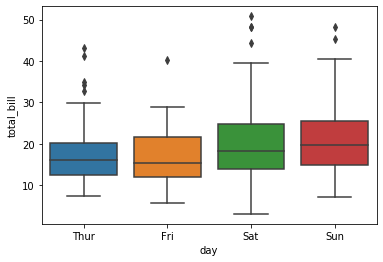

In [69]:
sns.boxplot(x="day", y="total_bill", data=tips);

In [70]:
cor = tips.corr()

In [72]:
cor

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


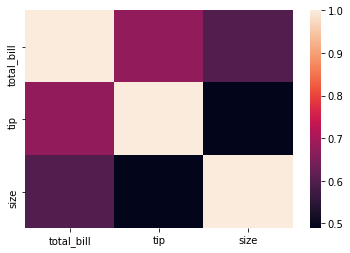

In [73]:
sns.heatmap(cor)

In [74]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [82]:
tips=tips_copy.copy()
tips_copy= tips.copy()
tips.shape, tips_copy.shape

((244, 7), (244, 7))

In [81]:
tips.merge(tips_copy,how="", left_index=True,right_index = True)

,total_bill_x,tip_x,sex_x,smoker_x,day_x,time_x,size_x,total_bill_y,tip_y,sex_y,smoker_y,day_y,time_y,size_y
0,16.99,1.01,Female,No,Sun,Dinner,2,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2,14.78,3.23,Male,No,Sun,Dinner,2


In [99]:
tips.groupby(["day"], as_index=False, sort=False,observed=False).count().sort_values("total_bill", ascending = False)

,day,total_bill,tip,sex,smoker,time,size
1,Sat,87,87,87,87,87,87
0,Sun,76,76,76,76,76,76
2,Thur,62,62,62,62,62,62
3,Fri,19,19,19,19,19,19


In [101]:
from scipy.stats import chi2_contingency,ttest_ind_from_stats,ttest_ind,f_oneway
#from stats.models.stats.multicomp 

In [108]:
ar =pd.crosstab(columns =tips.smoker, index=[tips.sex])

In [106]:
chi2_contingency(ar)

(0.008763290531773594, 0.925417020494423, 1, array([[59.84016393, 33.15983607],
        [97.15983607, 53.84016393]]))

In [107]:
ar

sex,Male,Female
smoker,,
Yes,60,33
No,97,54


In [109]:
chi2_contingency(ar)

(0.008763290531773594, 0.925417020494423, 1, array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [110]:
ar

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


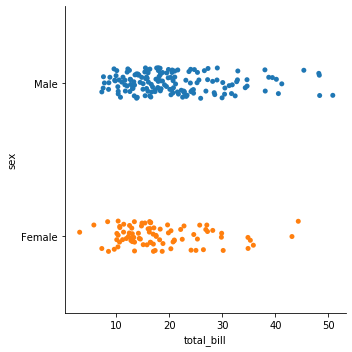

In [123]:
sns.catplot(x="total_bill",y="sex",data= tips)

In [121]:
tips[tips["sex"]=="Male"]["total_bill"]

1      10.34
2      21.01
3      23.68
5      25.29
6       8.77
       ...  
236    12.60
237    32.83
239    29.03
241    22.67
242    17.82
Name: total_bill, Length: 157, dtype: float64

In [127]:
ttest_ind(tips[tips["sex"]=="Male"]["total_bill"], tips[tips["sex"]=="Female"]["total_bill"], equal_var=True)

Ttest_indResult(statistic=2.2777940289803134, pvalue=0.0236116668468594)

In [126]:
f_oneway(tips[tips["sex"]=="Male"]["total_bill"], tips[tips["sex"]=="Female"]["total_bill"])

F_onewayResult(statistic=5.188345638458361, pvalue=0.023611666846859697)

In [133]:
f_oneway(tips[tips["day"]=="Sun"]["total_bill"], tips[tips["day"]=="Sat"]["total_bill"],
        tips[tips["day"]=="Thur"]["total_bill"],tips[tips["day"]=="Fri"]["total_bill"])

F_onewayResult(statistic=2.7674794432863363, pvalue=0.04245383328952047)

In [131]:
tips.day.unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [135]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)

In [142]:
mc1 =MultiComparison(tips["total_bill"],groups=tips["day"])
res1=mc1.tukeyhsd()
print(res1)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   Fri    Sat   3.2898 0.4554 -2.4802  9.0598  False
   Fri    Sun   4.2584 0.2373 -1.5859 10.1028  False
   Fri   Thur   0.5312    0.9 -5.4437   6.506  False
   Sat    Sun   0.9686 0.8921 -2.6089  4.5462  False
   Sat   Thur  -2.7586 0.2375 -6.5456  1.0284  False
   Sun   Thur  -3.7273 0.0669 -7.6266  0.1721  False
----------------------------------------------------


In [144]:
t =tips.duplicated()
t.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

ewwerqweqwe <b>ewwqe</b>

In [145]:
!curl https://topcs.blob.core.windows.net/public/FlightData.csv -o flightdata.csv